### Question 1

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread("10 no.jpg" , cv2.IMREAD_GRAYSCALE)
# convert it to numy array
image = np.array(image , dtype=np.float32)

Apply Fourier Transformation

In [ ]:
def FourierTransformation(image):
    M , N = image.shape
    temp_array = np.zeros((M, N), dtype=np.complex128)
    for u in range(M):
        for v in range(N):
            sum = 0
            for x in range(M):
                for y in range(N):
                    exponent = -2j * np.pi * ((u * x / M) + (v * y / N))
                    sum += image[x , y] * np.exp(exponent)
            temp_array[u , v] = sum
    return temp_array

In [35]:
fourier_image = FourierTransformation(image)

Apply Inverse Fourier Transformation


In [9]:
def InverseFourierTransformation(fourier_image):
    M , N = fourier_image.shape
    temp_array = np.zeros((M, N), dtype=np.complex128)
    for x in range(M):
        for y in range(N):
            sum = 0
            for u in range(M):
                for v in range(N):
                    exponent = 2j * np.pi * ((u * x / M) + (v * y / N))
                    sum += fourier_image[u , v] * np.exp(exponent)
            product = (1/(M * N)) * sum
            temp_array[x , y] = product
    return temp_array

In [21]:
inverse_fourier_image = InverseFourierTransformation(fourier_image)

Compute Mean Squared Error

In [ ]:
def computeMSE(image , inverse_fourier_image):
    inverse_fourier_image = np.real(inverse_fourier_image)
    M , N = image.shape
    result = np.sum((image - inverse_fourier_image) ** 2) / (M * N)
    return np.real(result) # return the real part of an image

In [41]:
MSE_value = computeMSE(image, inverse_fourier_image)

In [42]:
print(f"Mean Squared Error is {MSE_value}")

Mean Squared Error is 2.9206650803177024e-24


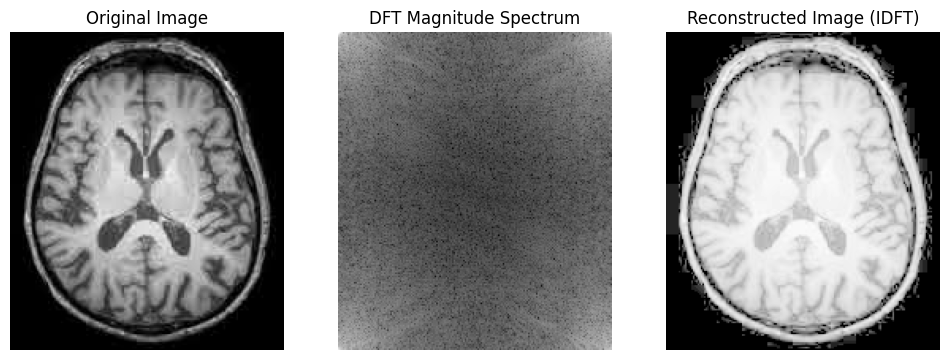

In [43]:
# Plot the results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Fourier Transform (Magnitude Spectrum)
plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(fourier_image)), cmap="gray")  # Log scaling for better visibility
plt.title("DFT Magnitude Spectrum")
plt.axis("off")

# Inverse Fourier Transform (Reconstructed Image)
plt.subplot(1, 3, 3)
plt.imshow(np.log(1 + np.abs(inverse_fourier_image)), cmap="gray")  # Log scaling for better visibility
plt.title("Reconstructed Image (IDFT)") 
plt.axis("off")

plt.show()

### Question 2

Frequency Spectrum

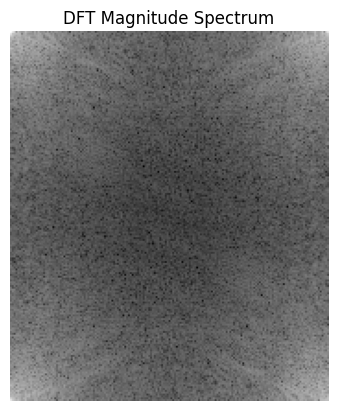

In [44]:
plt.imshow(np.log(1 + np.abs(fourier_image)), cmap="gray")  # Log scaling for better visibility
plt.title("DFT Magnitude Spectrum")
plt.axis("off")

plt.show()

Power Spectrum

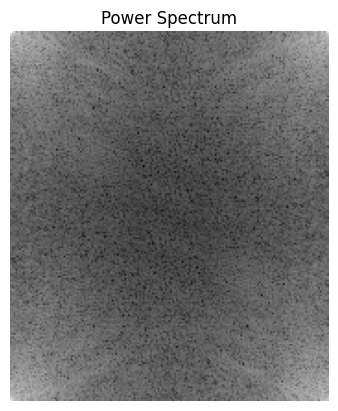

In [45]:
power_spectrum = np.abs(fourier_image) ** 2
plt.imshow(np.log(1 + power_spectrum), cmap='gray')
plt.title("Power Spectrum")
plt.axis("off")
plt.show()

### Question 3

Ideal Low Pass filter

In [46]:
def Ideal_lowpassfilter(image , cutoff_frequency):
    M , N = image.shape
    temp_image = np.zeros((M , N))
    center_x , center_y = M // 2 , N // 2
    for i in range(M):
        for j in range(N):
            D = np.sqrt((i - center_x) ** 2 + (j - center_y) ** 2)
            if D <= cutoff_frequency:
                temp_image[i , j] = 1
    return temp_image 

In [47]:
cut_of_frequency = 75
Ideal_low_pass = Ideal_lowpassfilter(image , cut_of_frequency)

ButterWorth Low Pass filter

In [48]:
def ButterWorth_lowpassfilter(image ,  cut_of_frequency , n):
    M , N = image.shape
    temp_image = np.zeros((M , N))
    center_x , center_y = M // 2 , N // 2
    for i in range(M):
        for j in range(N):
            D = np.sqrt((i - center_x) ** 2 + (j - center_y) ** 2)
            temp_image[i , j] = 1 / (1 + (D / cut_of_frequency) ** (2 * n))
    return temp_image

In [49]:
n = 2
ButterWorthFilter = ButterWorth_lowpassfilter(image , cut_of_frequency , n)

Gaussian Low-Pass Filter (GLPF)

In [50]:
def Gaussian_lowpassfilter(image ,  cut_of_frequency):
    M , N = image.shape
    temp_image = np.zeros((M , N))
    center_x , center_y = M // 2 , N // 2
    for i in range(M):
        for j in range(N):
            D = np.sqrt((i - center_x)**2 + (j - center_y)**2)
            temp_image[i , j] = np.exp(-(D**2) / (2* (cut_of_frequency ** 2)))
    return temp_image

In [51]:
GaussianFilter = Gaussian_lowpassfilter(image ,  cut_of_frequency)

Generate Fourier Transform of the Filters

In [52]:
Fourier_Ideallowpass = fourier_image * Ideal_low_pass
Fourier_ButterWorth = fourier_image * ButterWorthFilter
Fourier_Gaussianlowpass = fourier_image * GaussianFilter

Generate Inverse Fourier Transform of Filters

In [53]:
Inverse_Fourier_Ideallowpass = InverseFourierTransformation(Fourier_Ideallowpass)
Inverse_Fourier_ButterWorth = InverseFourierTransformation(Fourier_ButterWorth)
Inverse_Fourier_Gaussianlowpass = InverseFourierTransformation(Fourier_Gaussianlowpass)

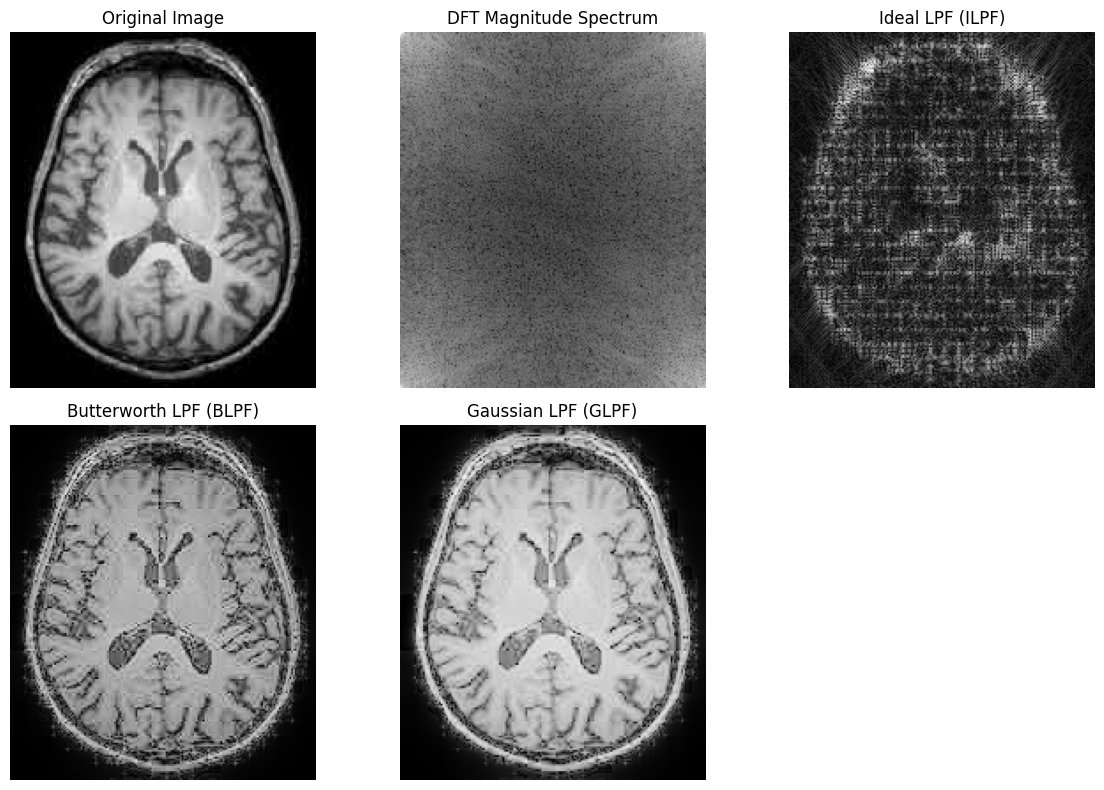

In [54]:
# Plot results
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")


# DFT Magnitude Spectrum
plt.subplot(2, 3, 2)
plt.imshow(np.log(1 + np.abs(fourier_image)), cmap="gray")
plt.title("DFT Magnitude Spectrum")
plt.axis("off")

# Ideal LPF Filtered Image
plt.subplot(2, 3, 3)
plt.imshow(np.log(1 + np.abs(Inverse_Fourier_Ideallowpass)), cmap="gray")
plt.title("Ideal LPF (ILPF)")
plt.axis("off")


# Butterworth LPF Filtered Image
plt.subplot(2, 3, 4)
plt.imshow(np.log(1 + np.abs(Inverse_Fourier_ButterWorth)), cmap="gray")
plt.title("Butterworth LPF (BLPF)")
plt.axis("off")

# Gaussian LPF Filtered Image
plt.subplot(2, 3, 5)
plt.imshow(np.log(1 + np.abs(Inverse_Fourier_Gaussianlowpass)), cmap="gray")
plt.title("Gaussian LPF (GLPF)")
plt.axis("off")

plt.tight_layout()
plt.show()

Comparison : 
1. Ideal Lowpass Filter Has more ringing effect and Less details
2. While Butterworth Preserve some details and reduce ringing effect
3. And Gaussian Filter has less destortion and more smooth

### Question 4

In [89]:
image2 = cv2.imread('Y10.jpg' , cv2.IMREAD_GRAYSCALE)

image2 = np.array(image2 , dtype = np.float32)

High Frequency Emphasis Filter

In [90]:
cut_of_frequency = 90
ideal_lowpass_yes = Ideal_lowpassfilter(image2 , cut_of_frequency )
ideal_highpassfilter = 1 - ideal_lowpass_yes
A = 1.5
B = 1.7
high_frequency_emphasis_filter = A + B * ideal_highpassfilter

Fourier Transformation Of an Image

In [91]:
# Used Optimized Approch Because Image size is bigger

# def FourierTransformation(image):
#     M , N = image.shape
#     temp_array = np.zeros((M, N), dtype=np.complex128)
#     for u in range(M):
#         for v in range(N):
#             sum = 0
#             for x in range(M):
#                 for y in range(N):
#                     exponent = -2j * np.pi * ((u * x / M) + (v * y / N))
#                     sum += image[x , y] * np.exp(exponent)
#             temp_array[u , v] = sum
#     return temp_array

# Break down above code for handling complexity

def DFT(pixels):
    N = len(pixels)
    output = np.zeros(N, dtype=np.complex128)
    for u in range(N):
        sum = 0
        for x in range(N):
            exponent = -2j * np.pi * (u * x / N)
            sum += pixels[x] * np.exp(exponent)
        output[u] = sum
    return output

def FourierTransformation(image):
    M, N = image.shape
    temp_array = np.zeros((M, N), dtype=np.complex128)

    # Compute 1D DFT along each row
    for x in range(M):
        temp_array[x, :] = DFT(image[x, :])

    # Compute 1D DFT along each column
    temp_array2 = np.zeros((M, N), dtype=np.complex128)
    for y in range(N):
        temp_array2[:, y] = DFT(temp_array[:, y])

    return temp_array2

In [92]:
fourier_image_yes = FourierTransformation(image2)

In [93]:
filtered_image = high_frequency_emphasis_filter * fourier_image_yes

Inverse Fourier Transformation

In [94]:
# def InverseFourierTransformation(fourier_image):
#     M , N = fourier_image.shape
#     temp_array = np.zeros((M, N), dtype=np.complex128)
#     for x in range(M):
#         for y in range(N):
#             sum = 0
#             for u in range(M):
#                 for v in range(N):
#                     exponent = 2j * np.pi * ((u * x / M) + (v * y / N))
#                     sum += fourier_image[u , v] * np.exp(exponent)
#             product = (1/(M * N)) * sum
#             temp_array[x , y] = product
#     return temp_array


# Break Downed above code To handle complexity

def IDFT(pixels):
    N = len(pixels)
    output = np.zeros(N, dtype=np.complex128)
    for x in range(N):
        sum = 0
        for u in range(N):
            exponent = 2j * np.pi * (u * x / N)
            sum += pixels[u] * np.exp(exponent)
        output[x] = sum / N
    return output
    
    
def InverseFourierTransformation(fourier_image):
    M , N = fourier_image.shape
    temp_array = np.zeros((M, N), dtype=np.complex128)
    
    for y in range(N):
        temp_array[: , y] = IDFT(fourier_image[: , y])
    
    reconstructed_image = np.zeros((M , N) , dtype=np.complex128)
    for x in range(M):
        reconstructed_image[x , :] = IDFT(temp_array[x , :])
    return reconstructed_image

In [95]:
reconstructed_image_yes = InverseFourierTransformation(fourier_image_yes)

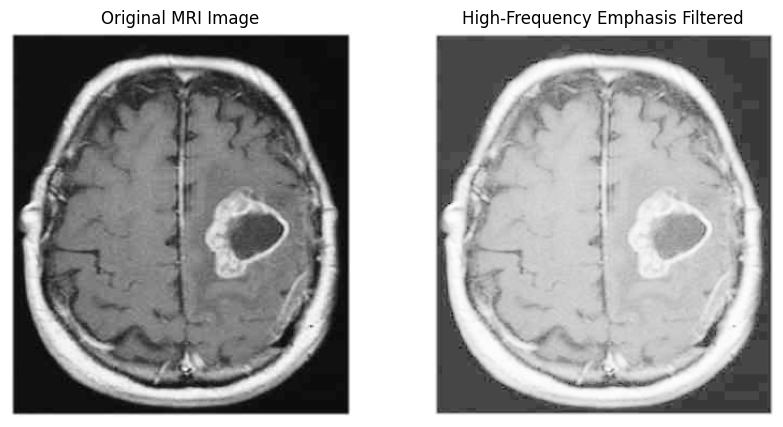

In [96]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2, cmap="gray")
plt.title("Original MRI Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + np.abs(reconstructed_image_yes)), cmap="gray")
plt.title("High-Frequency Emphasis Filtered")
plt.axis("off")

plt.show()

### Question 6

In [102]:
def computeMSE(original , filtered):
    filtered = np.real(filtered)
    M , N = original.shape
    result = np.sum((original - filtered) ** 2) / (M * N) 
    return result # return the real part of an image

def compute_psnr(original , filtered):
    max_pixel = 0
    mse = computeMSE(original , filtered)
    max_pixel = 255
    return 10 * np.log10((max_pixel ** 2) / mse)

def compute_powerspectrum(image):
    power_spectrum = np.sum(np.abs(image) ** 2)
    return power_spectrum

Image 1

In [106]:
Mean_squared_image_Butterworth = computeMSE(image , Inverse_Fourier_ButterWorth)
print("MSE of image 1 using Butterworth filter: ",  Mean_squared_image_Butterworth)

Mean_squared_image_Lowpass = computeMSE(image , Inverse_Fourier_Ideallowpass)
print("MSE of image 1 using Ideal LowPass filter: ",  Mean_squared_image_Lowpass)

Mean_squared_image_GausianLowpass = computeMSE(image , Inverse_Fourier_Gaussianlowpass)
print("MSE of image 1 using Gaussian LowPass filter: ",  Mean_squared_image_GausianLowpass)

# Calculate PSNR
PSNR_image1_Gaussian = compute_psnr(image , Inverse_Fourier_Gaussianlowpass)
print("PSNR of image 1 using Butterworth filter: ",  PSNR_image1_Gaussian)


# Calcualte power spectrum
Power_Spectrum_Image1 = compute_powerspectrum(inverse_fourier_image)
print("Power Spectrum image 1 after compression : ", Power_Spectrum_Image1)

Power_Spectrum_Image1_before = compute_powerspectrum(image)
print("Power Spectrum image 1 before compression : ", Power_Spectrum_Image1_before)


MSE of image 1 using Butterworth filter:  3079.525510267302
MSE of image 1 using Ideal LowPass filter:  3802.7846341942404
MSE of image 1 using Gaussian LowPass filter:  2305.3211298172646
PSNR of image 1 using Butterworth filter:  14.503489299737083
Power Spectrum image 1 after compression :  132392071.99999839
Power Spectrum image 1 before compression :  132392070.0


### MSE

1. The Ideal Low-Pass filter have the highest MSE because it removes more high frequencies sharply, causing ringing artifacts.
2. The Gaussian Low-Pass filter generally provides the best balance between smoothing and retaining edges, leading to a lower MSE than Ideal LPF and Butterworth LPF.
3. The Butterworth filter applies a more gradual cutoff, reducing MSE compared to Ideal but may be slightly higher than Gaussian.


### PSNR
1. The Ideal Low-Pass filter has the lowest PSNR because it removes more high frequencies sharply
2. The Gaussian Low-Pass filter generally provides the best PSNR
3. The Butterworth filter has a higher PSNR than Ideal LPF but lower than Gaussian LP

### Power Spectrum
1. I calculated Power Spectrum for inverse fourier transform of the image and original image in which we can see frequencies remained preserved

Image 2

In [108]:
Mean_squared_image2 = computeMSE(image2 , reconstructed_image_yes)
print("MSE of image 2: ", Mean_squared_image2)

PSNR_image2 = compute_psnr(image2 , reconstructed_image_yes)
print("PSNR of image 2 : " , PSNR_image2)

power_spectrum_before_image2 = compute_powerspectrum(image2)
power_spectrum_after_image2 = compute_powerspectrum(reconstructed_image_yes)
print("Power spectrum of image 2 before compression: ", power_spectrum_before_image2)
print("Power spectrum of image 2 after compression: ", power_spectrum_after_image2)


MSE of image 2:  5.593249083568139e-23
PSNR of image 2 :  270.6541620071891
Power spectrum of image 2 before compression:  1863270100.0
Power spectrum of image 2 after compression:  1863270035.9999797


### Question 7

In [105]:
def create_synthetic_image(size=100, square_size=50):
    image = np.zeros((size, size))
    start = (size - square_size) // 2
    end = start + square_size
    image[start:end, start:end] = 255  # White square
    return image

Creating image

In [68]:
image_q7 = create_synthetic_image()

Create Fourier Image

In [69]:
fourier_image_q7 = FourierTransformation(image_q7)

Apply Gaussian Low Pass filter

In [70]:
GaussianFilter_q7 = Gaussian_lowpassfilter(image_q7 , 70)
filtered_image_q7_Gaussian = fourier_image_q7 * GaussianFilter_q7

In [71]:
inverse_fourier_image_q7_gaussian = InverseFourierTransformation(filtered_image_q7_Gaussian)

Apply Simple ButterWorth Ideal

In [72]:
ButterWorthFilter_q7 = ButterWorth_lowpassfilter(image_q7 , 70 , 2)
filtered_image_q7_butterworth = fourier_image_q7 * ButterWorthFilter_q7

In [73]:
inverse_fourier_image_q7_butterworth = InverseFourierTransformation(filtered_image_q7_butterworth)

Apply Modified Butterworth filter

In [110]:
def ModifiedButterworth(image):
    alpha = 0.7
    Original_butterworth = ButterWorth_lowpassfilter(image , 60 , 2)
    return alpha + (1 - alpha) * Original_butterworth

Fourier_ButterWorth_q7 = ModifiedButterworth(image_q7)

In [111]:
ButterWorthFilter_q7_modified = ModifiedButterworth(image_q7)
filtered_image_q7_modifiedbutterworth = fourier_image_q7 * ButterWorthFilter_q7_modified

In [112]:
inverse_fourier_image_q7_modifiedbutterworth = InverseFourierTransformation(filtered_image_q7_modifiedbutterworth)

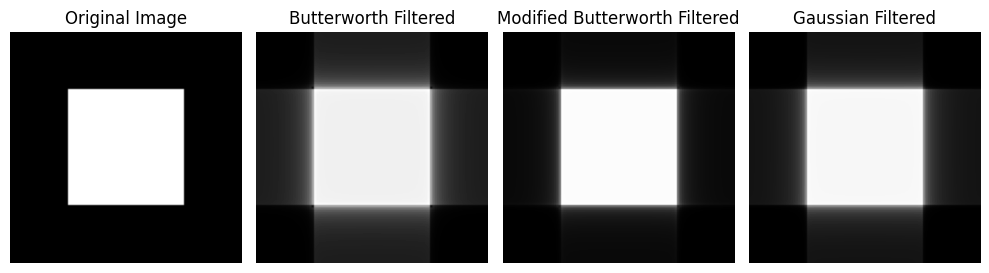

In [113]:
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(image_q7, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Butterworth Filtered
plt.subplot(1, 4, 2)
plt.imshow(np.log(1 + np.abs(inverse_fourier_image_q7_butterworth)), cmap='gray')
plt.title("Butterworth Filtered")
plt.axis("off")

# Modified Butterworth Filtered
plt.subplot(1, 4, 3)
plt.imshow(np.log(1 + np.abs(inverse_fourier_image_q7_modifiedbutterworth)), cmap='gray')
plt.title("Modified Butterworth Filtered")
plt.axis("off")

# Gaussian Filtered
plt.subplot(1, 4, 4)
plt.imshow(np.log(1 + np.abs(inverse_fourier_image_q7_gaussian)), cmap='gray')
plt.title("Gaussian Filtered")
plt.axis("off")

plt.tight_layout()
plt.show()


Comparing Ideal Low pass on different cuttoff Frequencies

60

In [78]:
Ideallowpass_Filter_q7 = Ideal_lowpassfilter(image_q7 , 60)
filtered_image_q7_Ideallowpass = fourier_image_q7 * Ideallowpass_Filter_q7

In [79]:
inverse_fourier_image_q7_ideallowpass = InverseFourierTransformation(filtered_image_q7_Ideallowpass)

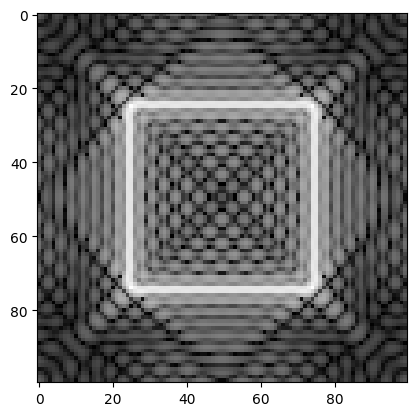

In [80]:
plt.imshow(np.log(1 + np.abs(inverse_fourier_image_q7_ideallowpass)) , cmap='gray')
plt.show()

40

In [81]:
Ideallowpass_Filter_q7 = Ideal_lowpassfilter(image_q7 , 40)
filtered_image_q7_Ideallowpass = fourier_image_q7 * Ideallowpass_Filter_q7

In [82]:
inverse_fourier_image_q7_ideallowpass = InverseFourierTransformation(filtered_image_q7_Ideallowpass)

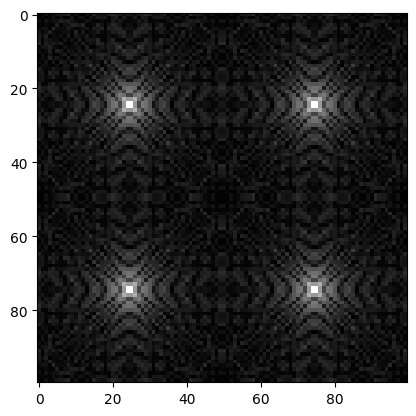

In [83]:
plt.imshow(np.log(1 + np.abs(inverse_fourier_image_q7_ideallowpass)) , cmap='gray')
plt.show()